<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement:" data-toc-modified-id="Problem-Statement:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement:</a></span></li><li><span><a href="#Importing-Packages" data-toc-modified-id="Importing-Packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Packages</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Visualizing-Feature-Distributions" data-toc-modified-id="Visualizing-Feature-Distributions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualizing Feature Distributions</a></span></li><li><span><a href="#Daily-Gross-Sales-Correlation-Heatmap" data-toc-modified-id="Daily-Gross-Sales-Correlation-Heatmap-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Daily Gross Sales Correlation Heatmap</a></span></li><li><span><a href="#Daily-Gross-Sales-(in-thousands)" data-toc-modified-id="Daily-Gross-Sales-(in-thousands)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Daily Gross Sales (in thousands)</a></span></li><li><span><a href="#ACF-&amp;-PACF-Plots" data-toc-modified-id="ACF-&amp;-PACF-Plots-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>ACF &amp; PACF Plots</a></span></li></ul></li><li><span><a href="#ADF-Test-for-Stationarity" data-toc-modified-id="ADF-Test-for-Stationarity-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ADF Test for Stationarity</a></span></li><li><span><a href="#Model-Prep" data-toc-modified-id="Model-Prep-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Prep</a></span></li><li><span><a href="#Model-Selection-with-AIC:" data-toc-modified-id="Model-Selection-with-AIC:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Selection with AIC:</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Baseline Model</a></span></li></ul></li><li><span><a href="#Conclusion-&amp;-Reccomendations" data-toc-modified-id="Conclusion-&amp;-Reccomendations-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion &amp; Reccomendations</a></span><ul class="toc-item"><li><span><a href="#The-Bible:" data-toc-modified-id="The-Bible:-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>The Bible:</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Problem Statement:

I am a consultant hired by restaurant owners, since new management has taken over their costs have gone through the roof and now they are 25K in the red on average each month. In order for them to recoup their loss I need to figure out how to properly structure their budgets. I will create a SARIMAX predictive sales model to base my customized bugets from. My metric will be RMSE to gauge my model with because the output will be on the same scale as my data. A succesful model will output predictive sales values within a $500.00 range.

## Importing Packages

- model interpetation 
- coeffs on time lags

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Import ARIMA model.
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
# Import Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import math



%matplotlib inline

# We are required to do this in order to avoid "FutureWarning" issues.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import itertools

import warnings
warnings.filterwarnings("ignore")

In [48]:
# #CREATE FUNCTION THAT READS IN CSV AND AND CLEANS DATA
# def data_reader_cleaner(df):
# # 1) read in csv
# data = pd.read_csv('./data/data_1.csv')
# # 2) reset_index
# data.reset_index(inplace=True)
# # 3)set colunms as row 0 
# data.columns = data.iloc[0]
# # 4) drop first and last columns
# data.drop([0,31], axis = 0, inplace = True)
# # 5) set index as date
#  data.set_index('Date', inplace = True)   
# 6) concats
# return df

In [49]:
data = pd.read_csv('./data/data_1.csv')

In [50]:
data_2 = pd.read_csv('./data/data_2.csv')

In [51]:
data_3 = pd.read_csv('./data/data_3.csv')

In [52]:
data_4 = pd.read_csv('./data/data_4.csv')

In [53]:
data_5 = pd.read_csv('./data/data_5.csv')

In [54]:
data.reset_index(inplace=True)

In [55]:
data_2.reset_index(inplace=True)

In [56]:
data_3.reset_index(inplace=True)

In [57]:
data_4.reset_index(inplace=True)

In [58]:
data_5.reset_index(inplace=True)

In [59]:
data.columns = data.iloc[0]

In [60]:
data_2.columns = data_2.iloc[0]

In [61]:
data_3.columns = data_3.iloc[0]

In [62]:
data_4.columns = data_4.iloc[0]

In [63]:
data_5.columns = data_5.iloc[0]

In [64]:
data_2.columns

Index(['Date', 'Day of the Week', 'Bill Count', 'Voids', 'Gross Sales',
       'Discounts', 'Net Sales', 'Menu Item Cost', 'Labor Cost', 'Margin'],
      dtype='object', name=0)

In [65]:
data.shape

(32, 10)

In [66]:
data_2.shape

(185, 10)

In [67]:
data_3.shape

(183, 10)

In [68]:
data_4.shape

(182, 10)

In [69]:
data_5.shape

(49, 10)

In [70]:
data.drop([0,31], axis = 0, inplace = True)

In [71]:
data_2.drop([0,184], axis = 0, inplace = True)

In [72]:
data_3.drop([0,182], axis = 0, inplace = True)

In [73]:
data_4.drop([0,181], axis = 0, inplace = True)

In [74]:
data_5.drop([0,48], axis = 0, inplace = True)

In [75]:
data.set_index('Date', inplace = True)

In [76]:
data_2.set_index('Date', inplace = True)

In [77]:
data_3.set_index('Date', inplace = True)

In [78]:
data_4.set_index('Date', inplace = True)

In [79]:
data_5.set_index('Date', inplace = True)

## Exploratory Data Analysis

In [80]:
data.describe()

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
count,30,30,30,30,30,30,30,30,30
unique,7,26,27,30,18,30,1,30,30
top,Saturday,103,$144.00,"$7,214.01",$0.00,"$4,391.00",$0.00,$622.87,"$3,391.48"
freq,5,3,2,1,13,1,30,1,1


In [81]:
data_2.describe()

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
count,183,183,183,183,183,183,183,183,183
unique,7,88,135,182,103,179,38,182,182
top,Sunday,82,$86.00,"$3,555.00",$0.00,"$6,029.00",$0.00,"$1,136.97","$3,048.28"
freq,27,8,5,2,70,3,86,2,2


In [82]:
data_3.describe()

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
count,181,181,181,181,181,181,181,181,181
unique,7,94,123,177,126,181,85,181,181
top,Saturday,65,$0.00,"$2,762.00",$0.00,"$3,299.75",$0.00,$950.97,"$1,553.76"
freq,26,6,13,2,38,1,12,1,1


In [83]:
data_4.describe()

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
count,180,180,180,180,180,180,180,180,180
unique,7,88,139,178,117,179,68,180,180
top,Saturday,78,$0.00,"$4,178.00",$0.00,"$6,114.30",$0.00,$974.40,"$7,103.43"
freq,26,8,5,2,28,2,28,1,1


In [84]:
data_5.describe()

,Day of the Week,Bill Count,Voids,Gross Sales,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin
count,47,47,47,47,47,47,47,47,47
unique,7,36,44,47,30,47,29,47,47
top,Sunday,78,$52.00,"$2,629.66",$0.00,"$2,629.66",$0.00,"$1,000.42","$1,116.67"
freq,7,3,2,1,13,1,6,1,1


In [85]:
data_2.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [86]:
data.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [87]:
data_3.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [88]:
data_4.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [89]:
data_5.isnull().sum().sort_values(ascending = False)

0
Margin             0
Labor Cost         0
Menu Item Cost     0
Net Sales          0
Discounts          0
Gross Sales        0
Voids              0
Bill Count         0
Day of the Week    0
dtype: int64

In [90]:
merge=pd.concat([data,data_2,data_3,data_4,data_5])

In [91]:
merge.dtypes

0
Day of the Week    object
Bill Count         object
Voids              object
Gross Sales        object
Discounts          object
Net Sales          object
Menu Item Cost     object
Labor Cost         object
Margin             object
dtype: object

In [92]:
t = ["Voids", "Gross Sales", "Discounts", "Net Sales", "Menu Item Cost", "Labor Cost", "Margin"]


In [93]:
merge[t] = merge[t].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [94]:
merge["Bill Count"] = merge["Bill Count"].astype(int)

In [95]:
merge = pd.concat([merge, pd.get_dummies(merge['Day of the Week'])], axis=1)

In [96]:
merge.drop('Day of the Week', axis = 1, inplace = True)

In [97]:
merge.sort_index(inplace = True)

In [98]:
x_cols = ["Voids", "Discounts", "Net Sales", "Menu Item Cost", "Labor Cost", "Margin", "Bill Count", "Sunday", "Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday"]

In [99]:
merge_shift = merge[x_cols].shift(7).dropna()

### Visualizing Feature Distributions

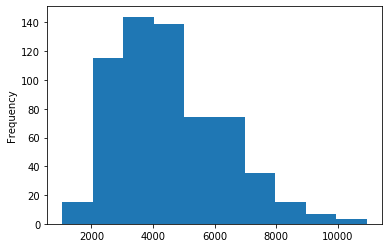

In [100]:
merge["Gross Sales"].plot(kind = "hist")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124395350>,
      dtype=object)

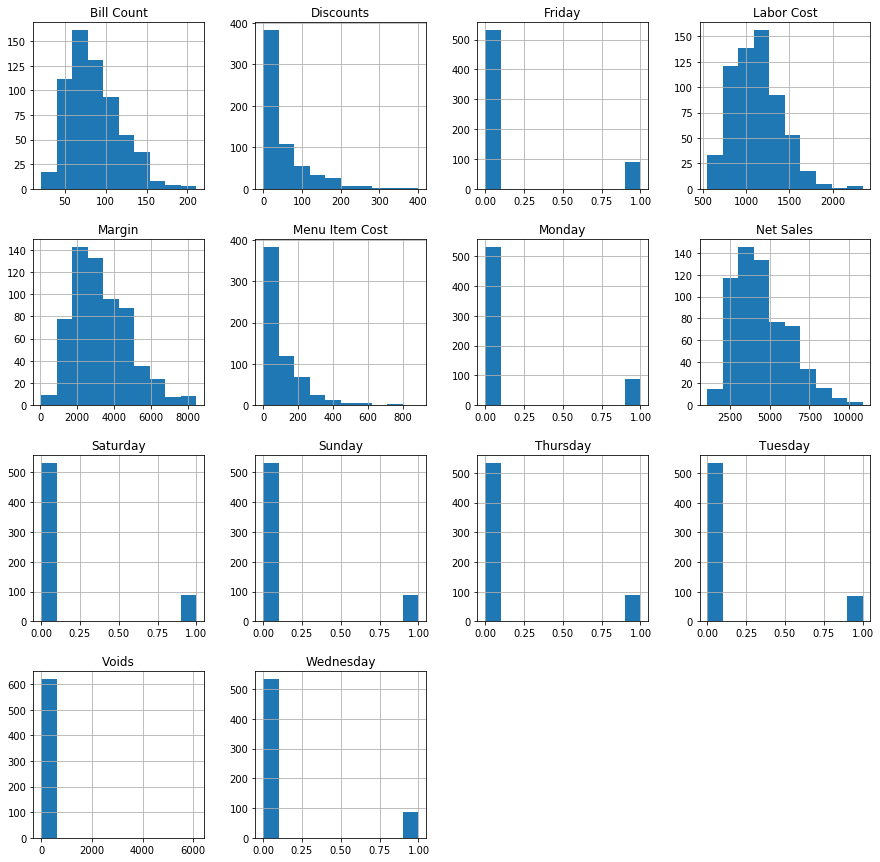

In [101]:
merge[x_cols].hist(figsize=(15, 15))

### Daily Gross Sales Correlation Heatmap 

In [102]:
def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    plt.figure(figsize=(12, 12))
    graph = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 
    return graph

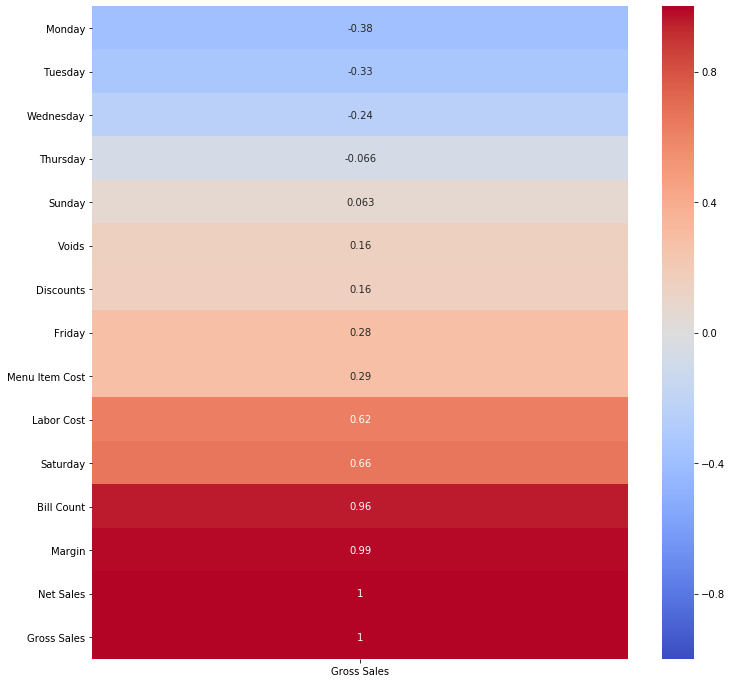

In [103]:
heatmap_numeric_w_dependent_variable(merge, "Gross Sales")

In [104]:
drop_corr_cols = ["Net Sales", "Margin"]

In [105]:
merge.drop(drop_corr_cols, axis = 1, inplace = True)

### Daily Gross Sales (in thousands)

In [106]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

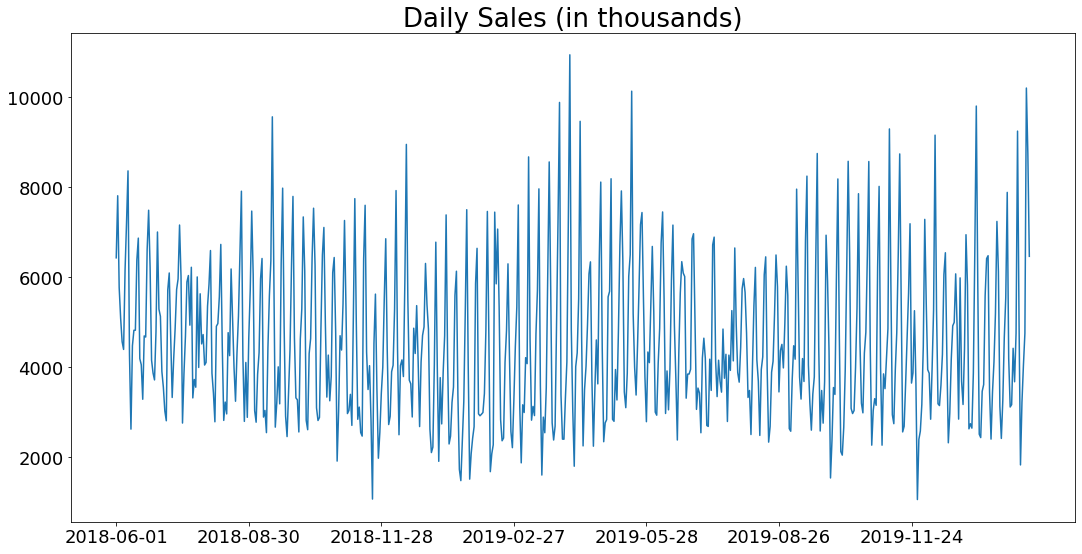

In [107]:
plot_series(merge, ['Gross Sales'], title = "Daily Sales (in thousands)", steps= 90)

### ACF & PACF Plots

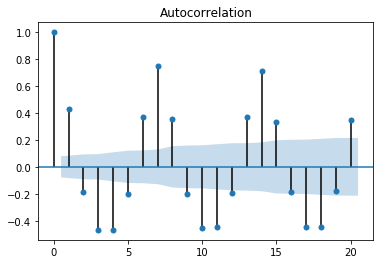

In [108]:
# Generate plot.
plot_acf(merge['Gross Sales'].dropna(), lags=20);

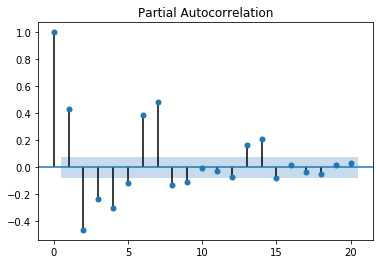

In [109]:
plot_pacf(merge['Gross Sales'].dropna(), lags=20);

## ADF Test for Stationarity

In [110]:
# Run ADF test on original (non-differenced!) data.
adfuller(merge['Gross Sales'])

(-4.413893331869135,
 0.00028047084978728866,
 14,
 606,
 {'1%': -3.4411869900487906,
  '5%': -2.866321181236609,
  '10%': -2.569316262893616},
 9994.277564875969)

In [111]:
# Code written by Joseph Nelson.
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [112]:
# Run ADF test on original (non-differenced!) data.
interpret_dftest(adfuller(merge['Gross Sales']))

Test Statistic   -4.413893
p-value           0.000280
dtype: float64

## Model Prep

In [113]:
merge_shift.index = pd.DatetimeIndex(merge_shift.index).to_period('d')

In [114]:
621 *.35

217.35

In [115]:
X_train = merge_shift.iloc[:404,:]

In [116]:
X_test = merge_shift.iloc[404:]

In [117]:
y = merge["Gross Sales"]

In [118]:
y = y.iloc[7:]

In [119]:
X_test = merge_shift.iloc[404:]

In [120]:
y_train =  y.iloc[:404]  

In [121]:
y_test = y.iloc[404:]

## Model Selection with AIC: 

In [173]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [174]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
            
# #  #best params           

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7986.045621479489
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7466.073754482237
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:7275.602742500962
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6864.6344855653315
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:7263.248099997239
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:7097.606842905361
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:7017.998625713373
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6775.930510092366
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7737.02187075953
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7439.1882974258515
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:7125.366185495714
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6655.0466712419
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:7449.14904264371
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6911.385180512967
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6869.089330567822
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:6652.59320917619
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:7181.871836759432
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:6924.96480647

In [124]:
y_test = y_test.to_frame()

In [125]:
y_train =  y_train.to_frame()

In [126]:
y_train.index = pd.DatetimeIndex(y_train.index).to_period('d')

## Modeling

In [127]:
# sarima = SARIMAX(endog = y_train,# inout the best params for this model
#                  order = (1, 1, 1),              # (p, d, q)
#                  seasonal_order = (1, 1, 1, 12),  # (P, D, Q, S)
#                  exog = X_train)
# # Fit SARIMA model
# model = sarima.fit()

In [128]:
# pip install pmdarima


In [129]:
import pmdarima as pm
model_auto = pm.auto_arima(y_train, start_p=1, start_q=1,
                          test='adf',
                          max_p=3, max_q=3,
                          m=1,
                          d=None,
                          seasonal=True,
                          start_P=0,
                          D=0,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True,
                          exogenous=X_train)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=6637.747, BIC=6709.773, Time=0.629 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6658.470, BIC=6722.493, Time=0.235 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6636.146, BIC=6704.170, Time=0.628 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=6638.357, BIC=6706.381, Time=0.844 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=6656.477, BIC=6716.498, Time=0.876 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=6637.897, BIC=6709.923, Time=0.702 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=6637.226, BIC=6713.253, Time=0.969 seconds
Total fit time: 4.892 seconds


In [130]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  404
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -3301.073
Date:                Wed, 11 Mar 2020   AIC                           6636.146
Time:                        21:37:28   BIC                           6704.170
Sample:                    06-08-2018   HQIC                          6663.074
                         - 07-17-2019                                         
Covariance Type:                  opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -3.0715    218.227     -0.014      0.989    -430.789     424.646
Voids              0.5000      0.552      0.906      0.365      -0.581       1.581
Discounts          0.8012      0.690      1.161      0.246      -0.552       2.154
Net Sales         -0.0514      0.118     -0.437      0.662      -0.282       0.179
Menu Item Cost    -0.0285      0.251     -0.113      0.910      -0.521       0.464
Labor Cost         0.0668      0.212      0.315      0.753      -0.348       0.482
Margin             0.2230      0.109      2.052      0.040       0.010       0.436
Bill Count         2.1806      4.811      0.453      0.650      -7.249      11.610
Sunday          3784.0346    109.240     34.640      0.000    3569.928    3998.141
Monday          2368.9945    148.573     15.945      0.000    2077.797    2660.192
Tuesday         2585.5165    141.464     18.277      0.000    2308.251    2862.782
Wednesday       2892.4472    120.487     24.006      0.000    2656.297    3128.597
Thursday        3506.7053     96.669     36.275      0.000    3317.237    3696.174
Friday          4672.4840    130.668     35.759      0.000    4416.380    4928.588
Saturday        5854.3527    206.194     28.392      0.000    5450.220    6258.485
ar.L1              0.2470      0.047      5.300      0.000       0.156       0.338
sigma2          7.322e+05   4.46e+04     16.426      0.000    6.45e+05     8.2e+05
===================================================================================
Ljung-Box (Q):                       49.84   Jarque-Bera (JB):                15.75
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             0.16
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.54e+21. Standard errors may be unstable.
"""

In [132]:
sarima = SARIMAX(endog = y_train,# inout the best params for this model
                 order = (2, 0, 1),              # (p, d, q)
                 seasonal_order = (0, 1, 2, 12),  # (P, D, Q, S)
                 exog = X_train) 
# Fit SARIMA model
model = sarima.fit()

In [133]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                             Gross Sales   No. Observations:                  404
Model:             SARIMAX(2, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -3254.563
Date:                                 Wed, 11 Mar 2020   AIC                           6549.125
Time:                                         21:38:02   BIC                           6628.551
Sample:                                     06-08-2018   HQIC                          6580.604
                                          - 07-17-2019                                         
Covariance Type:                                   opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Voids              0.1657      1.072      0.155      0.877      -1.935       2.267
Discounts          0.5960      1.287      0.463      0.643      -1.926       3.118
Net Sales          0.1724      0.228      0.755      0.450      -0.275       0.620
Menu Item Cost     0.2260      0.528      0.428      0.669      -0.810       1.262
Labor Cost        -0.0334      0.459     -0.073      0.942      -0.932       0.865
Margin            -0.0113      0.223     -0.051      0.959      -0.448       0.425
Bill Count        -0.2444      9.366     -0.026      0.979     -18.602      18.113
Sunday           160.5637   2719.877      0.059      0.953   -5170.297    5491.425
Monday         -1359.7197   2724.173     -0.499      0.618   -6699.001    3979.561
Tuesday        -1168.3983   2706.516     -0.432      0.666   -6473.072    4136.276
Wednesday       -835.0325   2685.707     -0.311      0.756   -6098.921    4428.856
Thursday        -183.0282   2670.256     -0.069      0.945   -5416.634    5050.578
Friday          1083.0973   2707.905      0.400      0.689   -4224.299    6390.494
Saturday        2302.5495   2757.784      0.835      0.404   -3102.608    7707.707
ar.L1              1.1694      0.116     10.064      0.000       0.942       1.397
ar.L2             -0.1788      0.111     -1.606      0.108      -0.397       0.039
ma.L1             -0.9139      0.062    -14.840      0.000      -1.035      -0.793
ma.S.L12          -0.9388      0.107     -8.768      0.000      -1.149      -0.729
ma.S.L24           0.0406      0.110      0.369      0.712      -0.175       0.256
sigma2          1.456e+06   1.48e+05      9.859      0.000    1.17e+06    1.75e+06
===================================================================================
Ljung-Box (Q):                       42.64   Jarque-Bera (JB):                22.15
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.19
Prob(H) (two-sided):                  0.68   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.49e+22. Standard errors may be unstable.
"""

In [172]:
y_train.index

PeriodIndex(['2018-06-08', '2018-06-09', '2018-06-10', '2018-06-11',
             '2018-06-12', '2018-06-13', '2018-06-14', '2018-06-15',
             '2018-06-16', '2018-06-17',
             ...
             '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11',
             '2019-07-12', '2019-07-13', '2019-07-14', '2019-07-15',
             '2019-07-16', '2019-07-17'],
            dtype='period[D]', name='Date', length=404, freq='D')

In [135]:
X_test.to_timestamp(freq = 'd')

,Voids,Discounts,Net Sales,Menu Item Cost,Labor Cost,Margin,Bill Count,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Date,,,,,,,,,,,,,,
2019-07-18,163.0,23.50,3460.50,46.0,1429.30,1985.20,68.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-07-19,80.0,220.50,6498.50,268.0,1416.77,4813.73,128.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-07-20,252.0,40.00,6852.00,192.0,1497.93,5162.07,139.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-07-21,105.0,35.75,4103.25,46.0,1142.04,2915.21,81.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-22,40.0,52.20,3293.80,48.0,947.51,2298.29,72.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-12,139.0,84.40,4335.60,196.0,1077.08,3062.52,78.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-02-13,127.0,33.00,3643.00,36.0,1188.58,2418.42,78.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-02-14,136.0,45.00,4715.00,12.0,1175.89,3527.11,79.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [158]:
X_test.index = pd.DatetimeIndex(X_test.index.to_timestamp()).to_period('d')
idx = pd.date_range('2019-07-18','2020-02-17').to_period('d');
X_test = X_test.reindex(idx, method = 'pad', fill_value=0)


In [159]:
X_test = X_test.fillna(method='ffill')

In [160]:
preds = model.predict(start = '2019-07-18', end = '2020-02-16', exog = X_test).to_frame()

In [161]:
y_test.index = pd.DatetimeIndex(y_test.index).to_period('d')

In [ ]:
X_test.index = pd.DatetimeIndex(X_test.index.to_timestamp()).to_period('d')
idx = pd.date_range('2019-07-18','2020-02-17').to_period('d');
X_test = X_test.reindex(idx, method = 'pad', fill_value=0)

In [162]:
preds.drop(preds.index.difference(y_test.index), inplace=True)

## Model Evaluation

### Baseline Model

In [163]:
merge["Gross Sales"].mean()

4563.761674718196

In [164]:
metrics.r2_score(y_test, preds)

-0.15831183571449858

In [165]:
mse = mean_squared_error(y_test[0:len(y_test)], preds)
mse

3596077.796109827

In [166]:
math.sqrt(mse)

1896.3327229444276

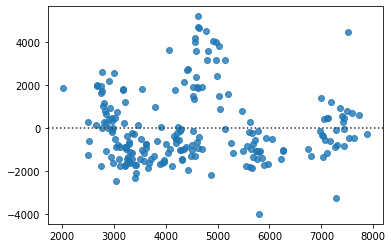

In [167]:
sns.residplot(preds, y_test)

In [168]:
y_test.index = y_test.index.to_timestamp()

In [169]:
preds.index = preds.index.to_timestamp()

In [196]:
y_train.index = y_train.index.to_timestamp()

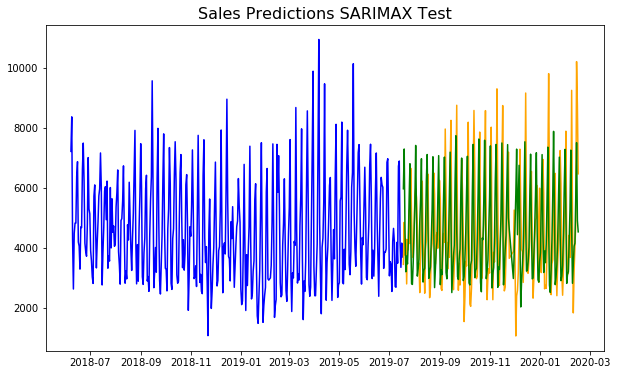

In [198]:
plt.figure(figsize=(10,6))
plt.plot(y_train, color = 'blue')
plt.plot(y_test, color = 'orange')
plt.plot(preds, color = 'green')


plt.title(label = 'Sales Predictions SARIMAX Test', fontsize=16)
plt.show();

## Conclusion & Reccomendations

### The Bible:

● Total prime less than 60%

● Food cost 25 to 30%

● Labor cost BOH 15% to 20%

● Labor cost FOH 10 to 15%

● Profitmax15%

● 7 extreme low. 12% average 15 is excellent 

## References